## Import Statements

In [174]:
import pandas as pd
import math
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import scatter_matrix

## Reading the Data Files

In [114]:
data_pizza = pd.read_csv("Ex06_Pizzademand_Regreesion.csv")

In [115]:
data_pizza_stan = (data_pizza-data_pizza.mean())/data_pizza.std()

In [116]:
data_pizza_stan_y = data_pizza_stan['PizzaDemand']

In [117]:
data_pizza_stan_x = data_pizza_stan.drop(['PizzaDemand'], axis=1)

## Basic Analysis

In [4]:
data_pizza.corr()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,PizzaDemand
PizzaPrice,1.000000,1.000000,-0.056121,-0.063815,0.163955,-0.116256,-0.059603,0.219790
BurgerPrice,1.000000,1.000000,-0.056121,-0.063815,0.163955,-0.116256,-0.059603,0.219790
RoomTemperature,-0.056121,-0.056121,1.000000,-0.023415,-0.091006,-0.064765,-0.161151,-0.075070
DeliveryMode,-0.063815,-0.063815,-0.023415,1.000000,-0.144249,0.015619,0.161165,-0.143826
Income,0.163955,0.163955,-0.091006,-0.144249,1.000000,-0.051338,-0.192671,0.974370
softdrinkPrice,-0.116256,-0.116256,-0.064765,0.015619,-0.051338,1.000000,0.151559,-0.271651
Location,-0.059603,-0.059603,-0.161151,0.161165,-0.192671,0.151559,1.000000,-0.219684
PizzaDemand,0.219790,0.219790,-0.075070,-0.143826,0.974370,-0.271651,-0.219684,1.000000


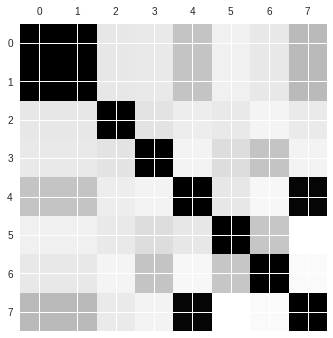

In [5]:
plt.matshow(data_pizza.corr())
plt.show()

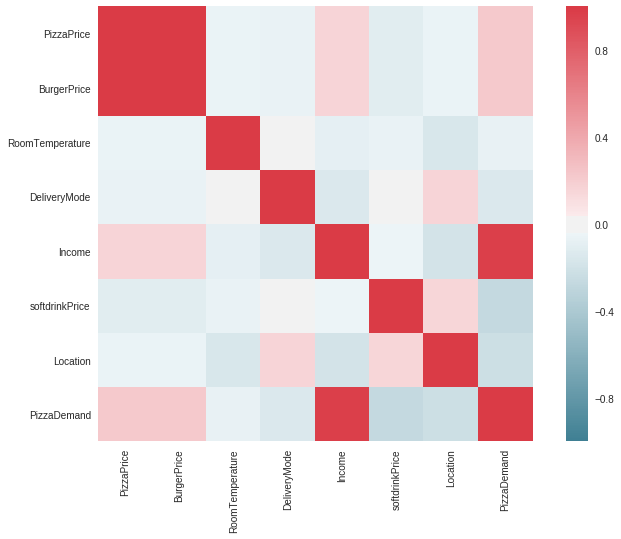

In [6]:
f, ax = plt.subplots(figsize=(12, 8))
corr = data_pizza.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Scatter plots regressors vs regressand

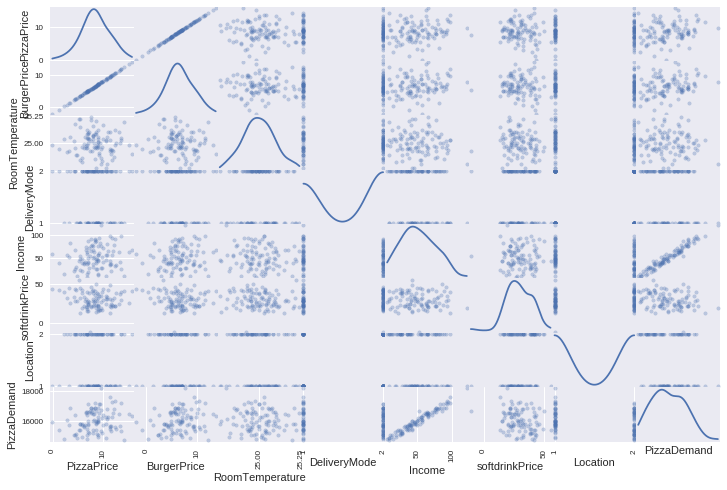

In [175]:
scatter_matrix(data_pizza, alpha=0.3, figsize=(12, 8), diagonal='kde')
plt.xticks(())
plt.yticks(())
plt.show()

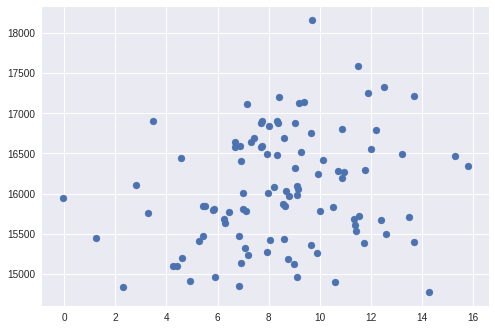

In [7]:
plt.scatter(data_pizza.PizzaPrice, data_pizza.PizzaDemand)
plt.show()

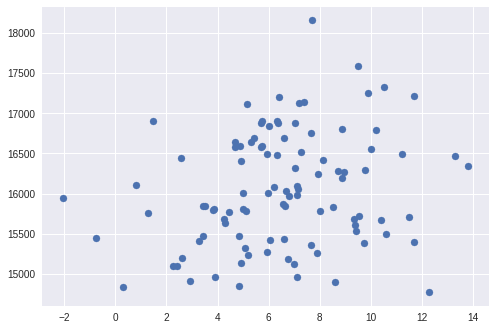

In [9]:
plt.scatter(data_pizza.BurgerPrice, data_pizza.PizzaDemand)
plt.show()

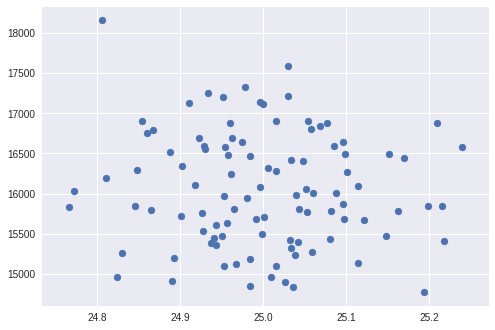

In [11]:
plt.scatter(data_pizza.RoomTemperature, data_pizza.PizzaDemand)
plt.show()

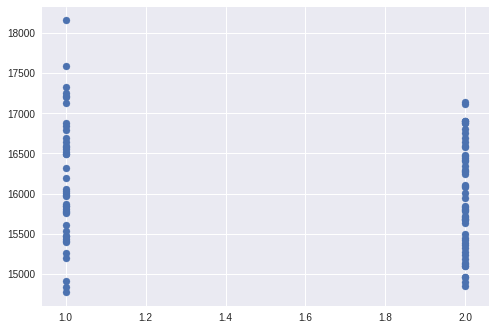

In [12]:
plt.scatter(data_pizza.DeliveryMode, data_pizza.PizzaDemand)
plt.show()

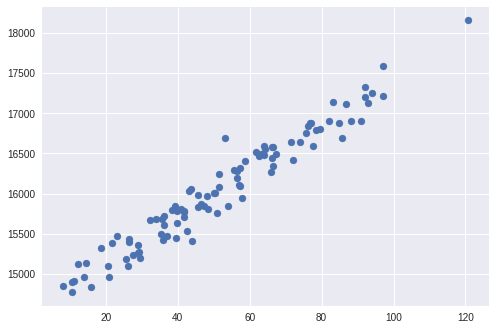

In [13]:
plt.scatter(data_pizza.Income, data_pizza.PizzaDemand)
plt.show()

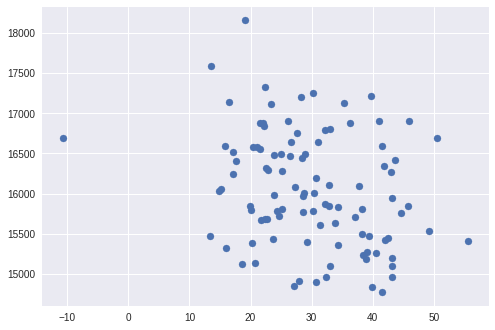

In [14]:
plt.scatter(data_pizza.softdrinkPrice, data_pizza.PizzaDemand)
plt.show()

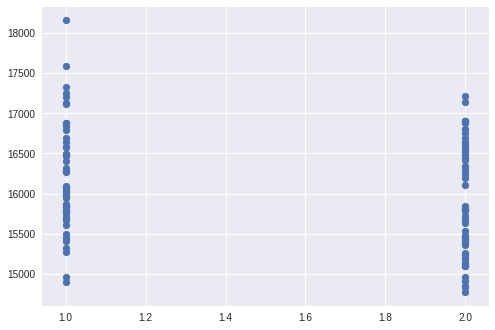

In [15]:
plt.scatter(data_pizza.Location, data_pizza.PizzaDemand)
plt.show()

## Creating the train and test datasets

In [118]:
data_pizza_y = data_pizza['PizzaDemand']
data_pizza_x = data_pizza.drop(['PizzaDemand'], axis=1)

In [119]:
data_pizza_x_train = data_pizza_x[:int(0.8*len(data_pizza_x))]
data_pizza_y_train = data_pizza_y[:int(0.8*len(data_pizza_y))]
data_pizza_x_test = data_pizza_x[int(0.8*len(data_pizza_x)):]
data_pizza_y_test = data_pizza_y[int(0.8*len(data_pizza_y)):]

## Normalising the Data

In [120]:
data_pizza_stan_x_train = (data_pizza_x_train-data_pizza_x_train.mean())/data_pizza_x_train.std()
data_pizza_stan_y_train = (data_pizza_y_train-data_pizza_y_train.mean())/data_pizza_y_train.std()
data_pizza_stan_x_test = (data_pizza_x_test-data_pizza_x_test.mean())/data_pizza_x_test.std()

## Linear Regression Model

In [176]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit (data_pizza_stan_x_train, data_pizza_stan_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [177]:
tr_coeffs = reg.coef_
tr_resi = reg.residues_
tr_intr = reg.intercept_
print("Coeffs: ", pd.Series(tr_coeffs, index=data_pizza_stan_x_test.columns))
print("Residuals: ", tr_resi)
print("Intercept: ", tr_intr)

Coeffs:  PizzaPrice        -8.103975e+08
BurgerPrice        8.103975e+08
RoomTemperature    4.157749e-07
DeliveryMode       1.763690e-05
Income             9.737864e-01
softdrinkPrice    -2.157659e-01
Location           1.958669e-05
dtype: float64
Residuals:  1.30384753232e-06
Intercept:  2.96908234573e-07


/home/user/StackRoute/Assignments/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [123]:
pred_lin = reg.predict(data_pizza_stan_x_test)

In [124]:
pred_lin = (pred_lin*data_pizza_y_test.std())+data_pizza_y_test.mean()

In [178]:
data_pizza.columns

Index(['PizzaPrice', 'BurgerPrice', 'RoomTemperature', 'DeliveryMode',
       'Income', 'softdrinkPrice', 'Location', 'PizzaDemand'],
      dtype='object')

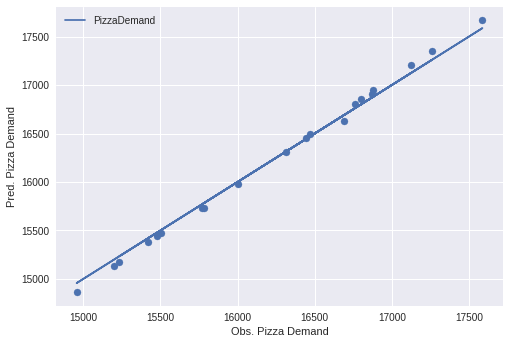

In [179]:
plt.scatter(data_pizza_y_test,pred_lin)
plt.plot(data_pizza_y_test,data_pizza_y_test)
plt.legend()
plt.xticks()
plt.yticks()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Pred. Pizza Demand')
plt.show()

In [150]:
errors_abs = np.abs(data_pizza_y_test-pred_lin)
errors = data_pizza_y_test-pred_lin

In [151]:
errors.mean()

-0.00051113604258716809

/home/user/StackRoute/Assignments/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


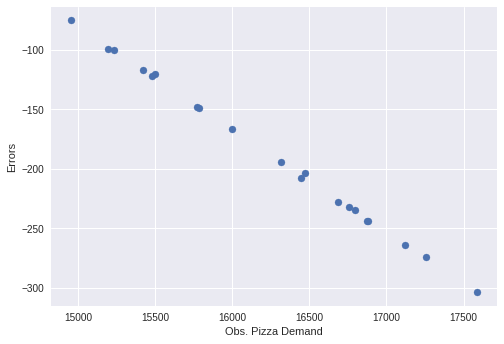

In [180]:
plt.scatter(data_pizza_y_test, errors)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Errors')
plt.show()

## Linear Regression Model : OLS

In [136]:
result = sm.ols(formula="PizzaDemand ~ PizzaPrice + BurgerPrice + RoomTemperature + DeliveryMode + Income + softdrinkPrice + Location", data=data_pizza_stan[:int(0.8*len(data_pizza_stan))]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.660e+06
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          8.56e-185
Time:                        10:11:46   Log-Likelihood:                 368.69
No. Observations:                  80   AIC:                            -721.4
Df Residuals:                      72   BIC:                            -702.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.249e-06      0.000     -0.018      0.985      -0.001       0.001
PizzaPrice      -8.618e+08   7.27e+10     -0.012      0.991   -1.46e+11    1.44e+11
BurgerPrice      8.618e+08   7.27e+10      0.012      0.991   -1.44e+11    1.46e+11
RoomTemperature  1.978e-07      0.000      0.001      0.999      -0.001       0.001
DeliveryMode     1.722e-05      0.000      0.059      0.953      -0.001       0.001
Income              0.9570      0.000   3083.036      0.000       0.956       0.958
softdrinkPrice     -0.2182      0.000   -721.228      0.000      -0.219      -0.218
Location         1.905e-05      0.000      0.062      0.950      -0.001       0.001
==============================================================================
Omnibus:                        1.042   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.604
Skew:                          -0.193   Prob(JB):                        0.739
Kurtosis:                       3.179   Cond. No.                     5.33e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [168]:
pred_ols = result.predict(data_pizza_stan_x[int(0.8*len(data_pizza_stan)):])

In [169]:
pred_ols = (pred_ols*data_pizza_y_test.std())+data_pizza_y_test.mean()

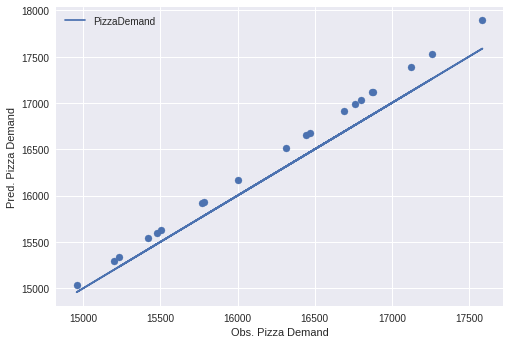

In [181]:
plt.scatter(data_pizza_y_test, pred_ols)
plt.plot(data_pizza_y_test, data_pizza_y_test)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Pred. Pizza Demand')
plt.show()

In [171]:
errors_abs = np.abs(data_pizza_y_test-pred_ols)
errors = data_pizza_y_test-pred_ols

In [172]:
errors.mean()

-186.34369119399571

/home/user/StackRoute/Assignments/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


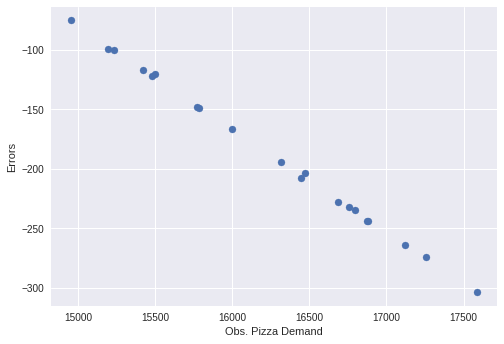

In [182]:
plt.scatter(data_pizza_y_test, errors)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Errors')
plt.show()

## Linear Regression Model : Ridge

In [184]:
alphas_r = np.linspace(0.00001,1,1000)*0.5

/home/user/StackRoute/Assignments/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


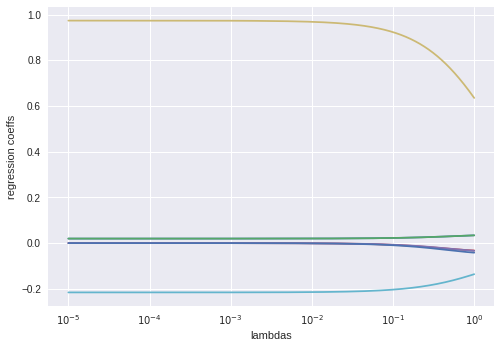

In [185]:
ridge = linear_model.Ridge(normalize=True)
coeffs = []
for al in alphas_r:
    ridge.set_params(alpha=al)
    ridge.fit(np.array(data_pizza_stan_x_train), np.array(data_pizza_stan_y_train))
    coeffs.append(ridge.coef_)
ax = plt.gca()
ax.plot(2*alphas_r, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.legend()
plt.xlabel('lambdas')
plt.ylabel('regression coeffs')
plt.show()

In [186]:
ridgecv = linear_model.RidgeCV(alphas=alphas_r, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(np.array(data_pizza_stan_x_train), np.array(data_pizza_stan_y_train))
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(np.array(data_pizza_stan_x_train), np.array(data_pizza_stan_y_train))
pred = ridge.predict(data_pizza_stan_x_test)
mean_squared_error(data_pizza_y_test, (pred*data_pizza_y_test.std())+data_pizza_y_test.mean())

3064.3354186224028

In [187]:
print(pd.Series(ridge.coef_, index=data_pizza_stan_x_test.columns))
print("Intercept: ", ridge.intercept_)
print("Aplha: ", ridge.alpha)

PizzaPrice         0.019789
BurgerPrice        0.019789
RoomTemperature   -0.000001
DeliveryMode       0.000017
Income             0.973780
softdrinkPrice    -0.215764
Location           0.000018
dtype: float64
Intercept:  -2.90924637276e-16
Aplha:  5e-06


In [189]:
pred_ridge = ridge.predict(data_pizza_stan_x_test)

In [190]:
pred_ridge = (pred_ridge*data_pizza_y_test.std())+data_pizza_y_test.mean()

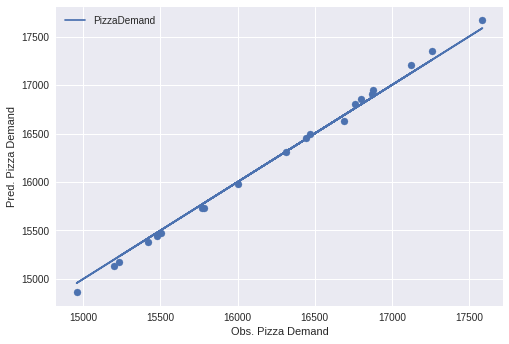

In [191]:
plt.scatter(data_pizza_y_test, pred_ridge)
plt.plot(data_pizza_y_test, data_pizza_y_test)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Pred. Pizza Demand')
plt.show()

In [193]:
errors_abs = np.abs(np.array(data_pizza_y_test)-pred_ridge)
errors = np.array(data_pizza_y_test).reshape(20,1)-pred_ridge.reshape(20,1)

In [194]:
errors.mean()

-4.4565240386873487e-12

/home/user/StackRoute/Assignments/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


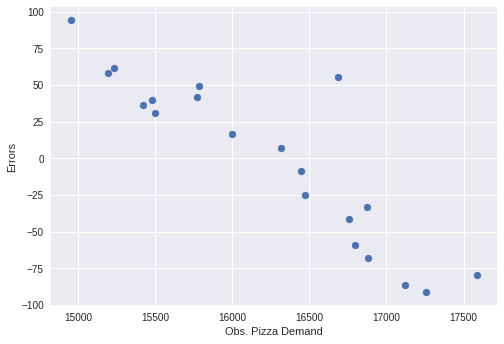

In [195]:
plt.scatter(np.array(data_pizza_y_test).reshape(20,1), errors)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Errors')
plt.show()

## Linear Regression Model : Lasso

In [197]:
alphas = np.linspace(0.00001,1,1000)*0.5

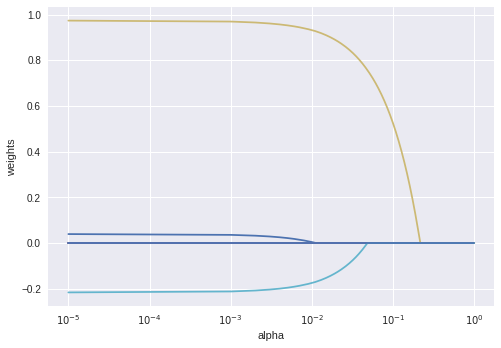

In [198]:
lasso = linear_model.Lasso(max_iter = 10000, normalize=True)
coeffs = []
for al in alphas:
    lasso.set_params(alpha=al)
    lasso.fit(np.array(data_pizza_stan_x_train), np.array(data_pizza_stan_y_train))
    coeffs.append(lasso.coef_)
ax = plt.gca()
ax.plot(2*alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [199]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(np.array(data_pizza_stan_x_train), np.array(data_pizza_stan_y_train))
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(np.array(data_pizza_stan_x_train), np.array(data_pizza_stan_y_train))
pred = lasso.predict(data_pizza_stan_x_test)
mean_squared_error(data_pizza_y_test, (pred*data_pizza_y_test.std())+data_pizza_y_test.mean())

2960.818611009855

In [200]:
print(pd.Series(lasso.coef_, index=data_pizza_stan_x_test.columns))
print("Intercept: ", lasso.intercept_)
print("Aplha: ", lasso.alpha)

PizzaPrice         3.882120e-02
BurgerPrice        1.756545e-18
RoomTemperature   -0.000000e+00
DeliveryMode      -0.000000e+00
Income             9.728776e-01
softdrinkPrice    -2.148681e-01
Location          -0.000000e+00
dtype: float64
Intercept:  -2.97259310857e-16
Aplha:  0.000108273791622


In [201]:
pred_lasso = lasso.predict(data_pizza_stan_x_test)

In [202]:
pred_lasso = (pred_lasso*data_pizza_y_test.std())+data_pizza_y_test.mean()

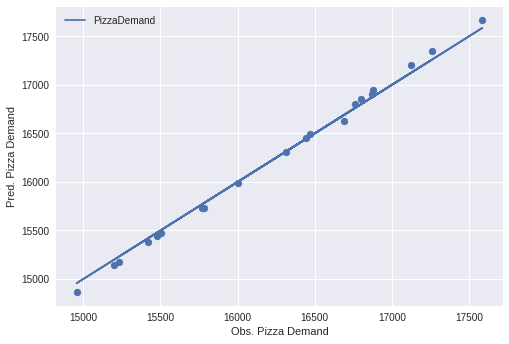

In [203]:
plt.scatter(data_pizza_y_test, pred_lasso)
plt.plot(data_pizza_y_test, data_pizza_y_test)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Pred. Pizza Demand')
plt.show()

In [204]:
errors_abs = np.abs(np.array(data_pizza_y_test)-pred_lasso)
errors = np.array(data_pizza_y_test).reshape(20,1)-pred_lasso.reshape(20,1)

In [205]:
errors.mean()

-4.0927261579781771e-12

/home/user/StackRoute/Assignments/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


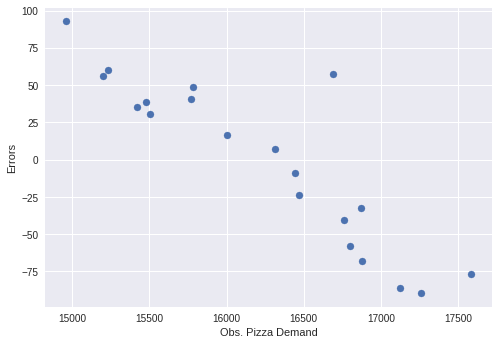

In [206]:
plt.scatter(np.array(data_pizza_y_test).reshape(20,1), errors)
plt.legend()
plt.xlabel('Obs. Pizza Demand')
plt.ylabel('Errors')
plt.show()

## Histogram of Errors

In [207]:
y = pd.DataFrame(errors)

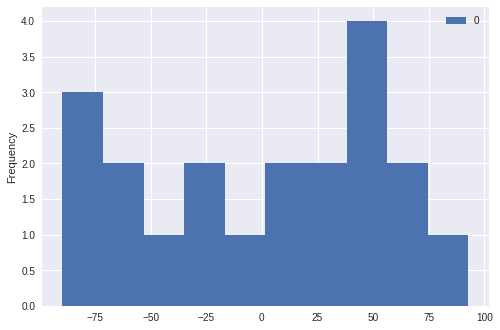

In [208]:
y.plot(kind = 'hist')
plt.show()

## Box Plot

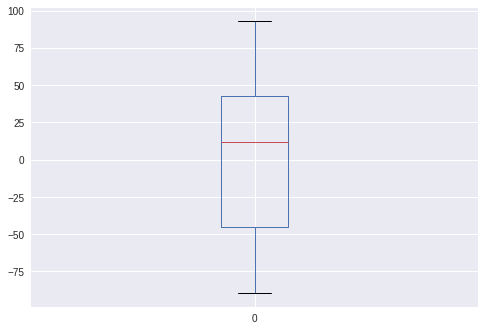

In [209]:
y.plot(kind = 'box')
plt.show()